# Clustering

### Due to the fact that we decided to use a subset of the data for this preliminary analysis, we will use the original dataframe without the rows that are not correct and we will correct them for the future analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import mapply
mapply.init(n_workers=7, progressbar=True)

import pickle
with open('scaler.pickle', 'rb') as f:
    scaler: StandardScaler = pickle.load(f)

# Read in the data
final = pd.read_csv('../dataset/data/final_clean.csv')

# Remember to the program which 🦆ing columns are objects
cat_cols = ['date_month', 'date_day', 'date_year', 'congressional_district', 'state', 'incident_characteristics1', 'city_or_county', 'party', 'CLEAN', 'OUTLIER']
final[cat_cols] = final[cat_cols].astype('object')


#show the number of rows and columns
final.shape

numerical = final.select_dtypes(include=['int64', 'float64'])

from sklearn.preprocessing import StandardScaler
local_scaler = StandardScaler()

numerical_scaled = local_scaler.fit_transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)
numerical_scaled.head()

numerical_scaled = numerical_scaled.sample(n=10000, random_state=0)

In [1]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# d = scaler.fit_transform(e.select_dtypes(include=['float64', 'int64']))
# d = pd.DataFrame(d, columns=e.select_dtypes(include=['float64', 'int64']).columns)
# d = d.join(e.select_dtypes(exclude=['float64', 'int64']))

# import pickle
# with open('scaler.pickle', 'wb') as f:
#     pickle.dump(scaler, f)

# pd.plotting.boxplot(d, figsize=(20, 5));
# plt.ylim(-5, 5)
# plt.xticks(rotation=90)
# plt.show()

In [2]:
with_b_labels = final.copy()

def is_greater_than_all(list_of_attrs):
    head = list_of_attrs[0]
    tails = list_of_attrs[1:]
    def is_greater_than_all_(row):
        ret = True
        for tail in tails:
            ret = ret and row[head] > row[tail]
        return ret
    return is_greater_than_all_

with_b_labels['isInjured'] = with_b_labels.mapply(is_greater_than_all(['n_injured', 'n_killed', 'n_arrested', 'n_unharmed']), axis=1)
with_b_labels['isKilled'] = with_b_labels.mapply(is_greater_than_all(['n_killed', 'n_injured', 'n_arrested', 'n_unharmed']), axis=1)
with_b_labels['isArrested'] = with_b_labels.mapply(is_greater_than_all(['n_arrested', 'n_killed', 'n_injured', 'n_unharmed']), axis=1)
with_b_labels['isMale'] = with_b_labels.mapply(is_greater_than_all(['n_males', 'n_females']), axis=1)
with_b_labels['isChild'] = with_b_labels.mapply(is_greater_than_all(['n_participants_child', 'n_participants_teen', 'n_participants_adult']), axis=1)
with_b_labels['isTeen'] = with_b_labels.mapply(is_greater_than_all(['n_participants_teen', 'n_participants_child', 'n_participants_adult']), axis=1)

# with_b_labels['isInjured'] = (3 * with_b_labels['n_injured']) > with_b_labels['n_killed'] + with_b_labels['n_arrested'] + with_b_labels['n_unharmed']
# with_b_labels['isKilled'] = (3 * with_b_labels['n_killed']) > with_b_labels['n_injured'] + with_b_labels['n_injured'] + with_b_labels['n_unharmed']
# with_b_labels['isArrested'] = (3 * with_b_labels['n_arrested']) > with_b_labels['n_killed'] + with_b_labels['n_injured'] + with_b_labels['n_unharmed']
# with_b_labels['isUnharmed'] = (3 * with_b_labels['n_unharmed']) > with_b_labels['n_killed'] + with_b_labels['n_injured'] + with_b_labels['n_arrested']
# with_b_labels['isMale'] = with_b_labels['n_males'] > with_b_labels['n_females']
# with_b_labels['isChild'] = (2 * with_b_labels['n_participants_child']) > with_b_labels['n_participants_teen'] + with_b_labels['n_participants_adult']
# with_b_labels['isTeen'] = (2 * with_b_labels['n_participants_teen']) > with_b_labels['n_participants_child'] + with_b_labels['n_participants_adult']
# with_b_labels['isAdult'] = (2 * with_b_labels['n_participants_adult']) > with_b_labels['n_participants_child'] + with_b_labels['n_participants_teen']

with_b_labels['concatIS'] = with_b_labels['isInjured'].astype(int).astype(str) + with_b_labels['isKilled'].astype(int).astype(str) + with_b_labels['isArrested'].astype(int).astype(str) + with_b_labels['isMale'].astype(int).astype(str) + with_b_labels['isChild'].astype(int).astype(str) + with_b_labels['isTeen'].astype(int).astype(str)

value_counts = with_b_labels['concatIS'].value_counts()

# with_b_labels[with_b_labels['concatIS'] ]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

In [4]:
vc_threshold = 1000
value_counts = value_counts[value_counts > vc_threshold]
to_pick = value_counts.min()

sample = with_b_labels[with_b_labels['concatIS'] == 'CACCA']

for vc in value_counts.index:
    sample = pd.concat([sample, with_b_labels[with_b_labels['concatIS'] == vc].sample(n=to_pick)])

sample = sample.sample(frac=1)
del sample['concatIS']
del sample['isInjured']
del sample['isKilled']
del sample['isArrested']
del sample['isMale']
del sample['isChild']
del sample['isTeen']
sample.head()

date_year date_month          state congressional_district  \
137705    2016.0         10     CALIFORNIA                   14.0   
47177     2015.0          2          TEXAS                   11.0   
148248    2016.0         11       VIRGINIA                    3.0   
199468    2017.0          8  WEST VIRGINIA                    2.0   
32216     2014.0         10        INDIANA                    2.0   

       incident_characteristics1 date_day city_or_county  latitude  longitude  \
137705              NON_SHOOTING       13       Pacifica  37.65630 -122.48500   
47177                  SHOT_DEAD        1     San Angelo  31.48900 -100.49200   
148248                 SHOT_DEAD        6       Richmond  38.57015  -86.24695   
199468              NON_SHOOTING       14     Charleston  38.33910  -81.61700   
32216                       MISC       31     South Bend  41.65460  -86.23490   

        min_age_participants  ...  month_cd_incidents  \
137705                  18.0  ...                   8   
47177                   52.0  ...                   8   
148248                  30.0  ...                  83   
199468                  26.0  ...                  14   
32216                   14.0  ...                  12   

        month_cd_votes_incidents  cd_population  percentage_republican  \
137705                  0.000028       836386.0               0.191369   
47177                   0.000067       737555.0               0.902696   
148248                  0.000266       694635.0               0.332980   
199468                  0.000058       640695.0               0.581813   
32216                   0.000083       713509.0               0.589415   

        percentage_democrat  cd_month_SHOT_INJURED  cd_month_SHOT_DEAD  \
137705             0.808631               0.500000            0.375000   
47177              0.097304               0.000000            0.375000   
148248             0.667020               0.566265            0.253012   
199468             0.418187               0.285714            0.214286   
32216              0.410585               0.416667            0.000000   

        cd_month_NON_SHOOTING  cd_month_OTHER  OUTLIER  
137705               0.125000        0.000000        5  
47177                0.375000        0.250000        6  
148248               0.048193        0.132530        6  
199468               0.285714        0.214286        0  
32216                0.000000        0.583333        4  

[5 rows x 60 columns]

In [5]:
clean_no_outliers = final[(final['OUTLIER'] == 0) & (final['CLEAN'] == 1)]
clean_w_outliers = final[final['CLEAN'] == 1]
no_outliers = final[final['OUTLIER'] == 0]

### We are left with a fraction of the original data, but it is still enough to work with, at least for this first part. 

---
---

# K-MEANS CLUSTERING

### We now use the K-means algorithm to cluster the data. We will use the silhouette score to find the optimal number of clusters.

  0%|          | 0/6 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(
 17%|█▋        | 1/6 [00:09<00:48,  9.76s/it]/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 33%|███▎      | 2/6 [00:19<00:38,  9.53s/it]/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/pyth

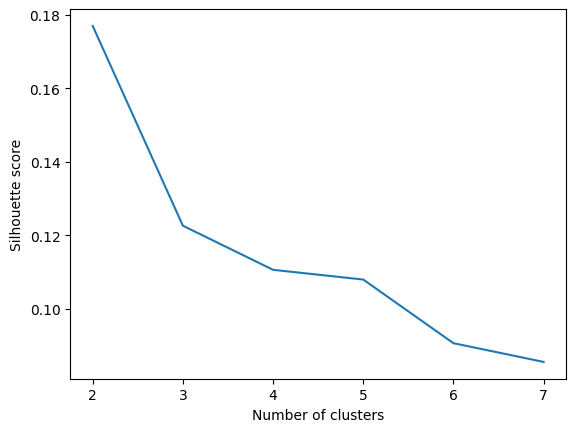

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# sample = no_outliers.sample(n=5000).copy()
numeric_cols = sample.select_dtypes(include=['float64', 'int64']).columns

numeric = sample[numeric_cols]
k_min = 2
k_max = 8
numeric_scaled = numeric
# KMeans
scores = []
for k in tqdm(range(k_min, k_max)):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(numeric_scaled)
    score = silhouette_score(numeric_scaled, kmeans.labels_)
    scores.append(score)
plt.plot(range(k_min, k_max), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### As we can see from the graph, the optimal number of clusters is 3, because it's the highest point of the curve.
### We will use 3 as the number of clusters for the K-means algorithm, and we will use PCA to reduce the dimensionality of the data to 2, so we can plot the clusters.


/home/simone/Unipi/InProgress/DM/DataMining-2023/.env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


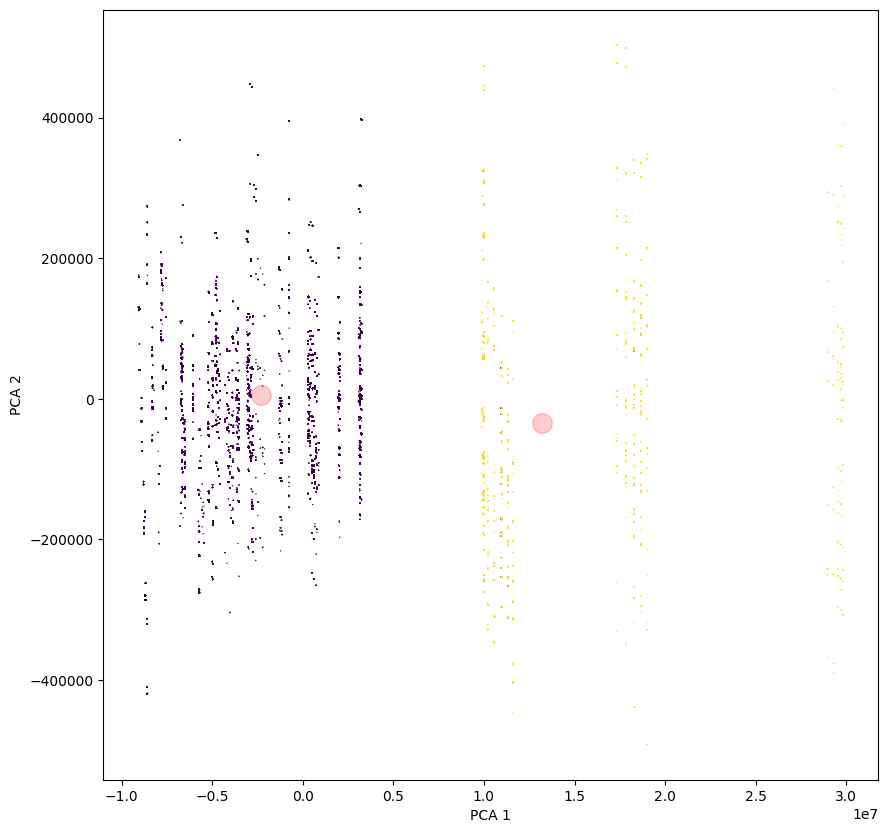

In [61]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

numeric_cols = no_outliers.select_dtypes(include=['float64', 'int64']).columns
numeric_scaled = no_outliers[numeric_cols]

# PCA
pca = PCA(n_components=2)
numeric_pca = pca.fit_transform(numeric_scaled)

# KMeans
scores = []
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=42).fit(numeric_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(numeric_pca[:, 0], numeric_pca[:, 1], c=kmeans.labels_, s=1, edgecolors='black', linewidths=0.001)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='red', s=200, alpha=0.2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



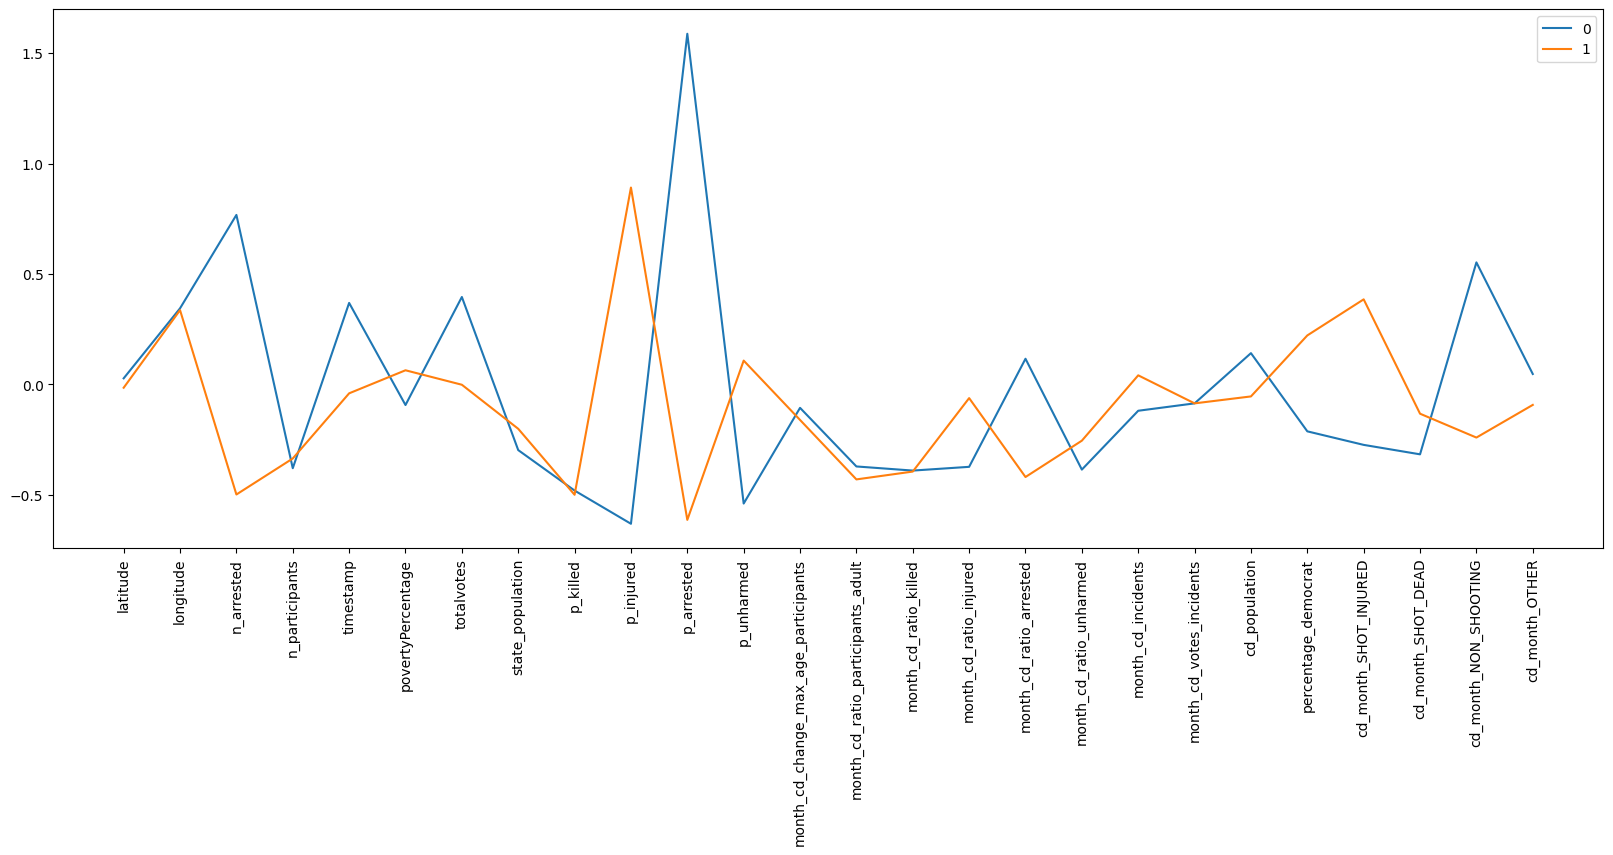

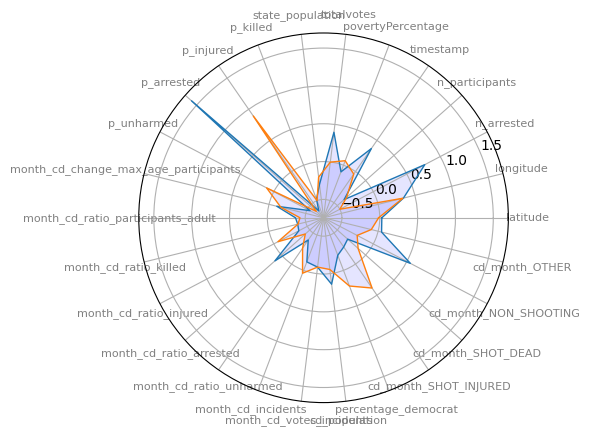

In [64]:
#Let's visualize the centroids of each cluster in the original feature space with two plots: a line plot and a radar plot.
plt.figure(figsize=(20, 7))
tran = kmeans.cluster_centers_
plt.plot(tran.T)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation='vertical')
plt.legend(range(k))
plt.show()

from math import pi
 
# number of variable
N = len(numeric_scaled.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(kmeans.cluster_centers_)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = kmeans.cluster_centers_[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the radar plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], numeric_scaled.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

### The following graphs will show the values of each attribute for each cluster

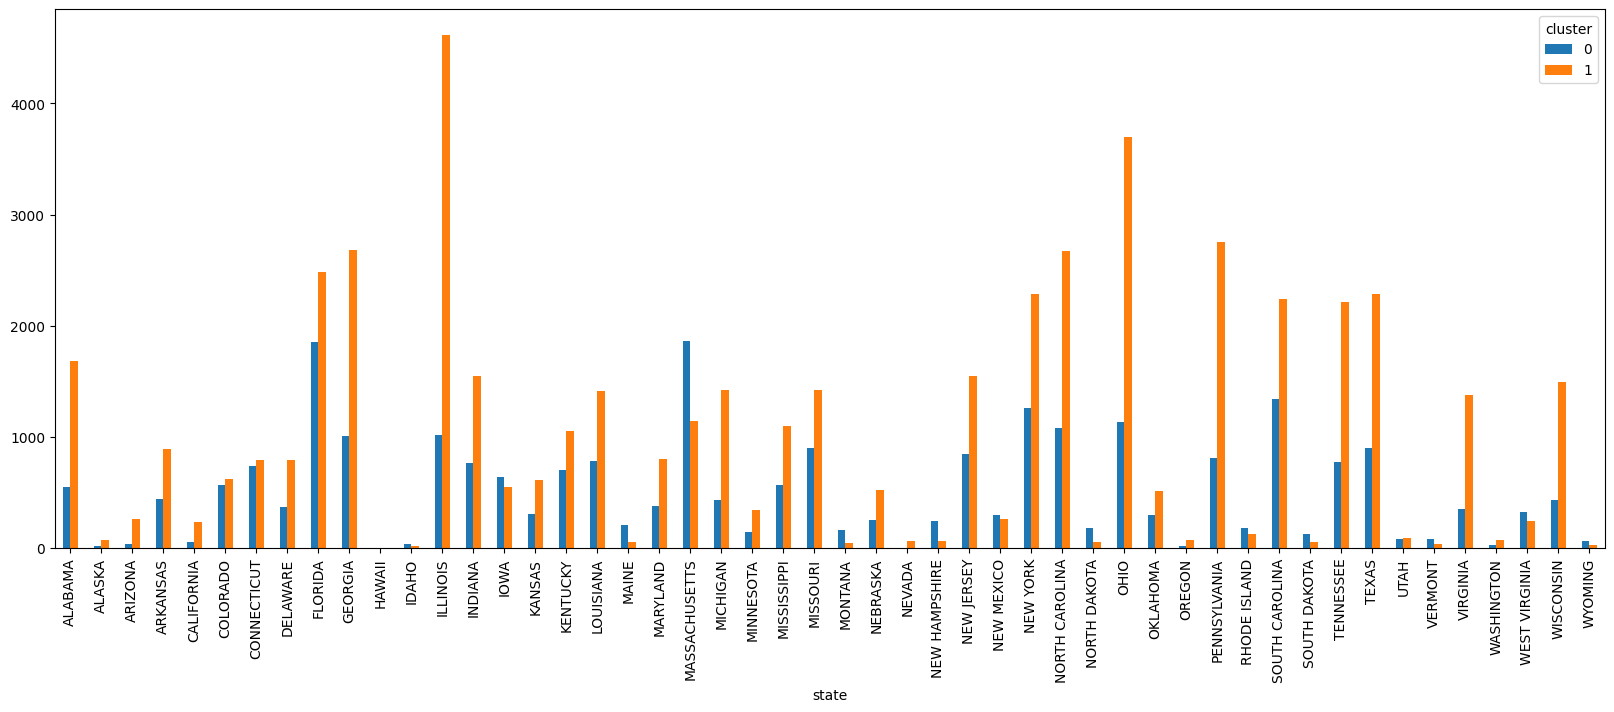

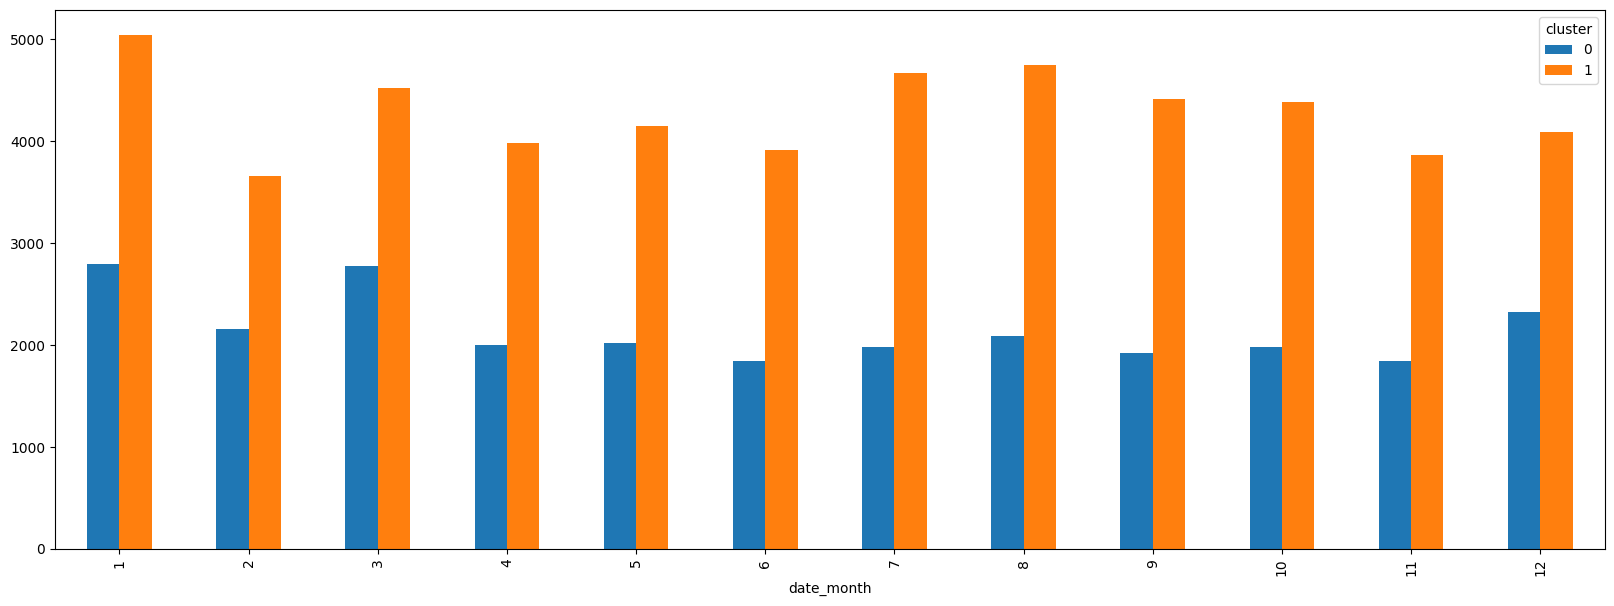

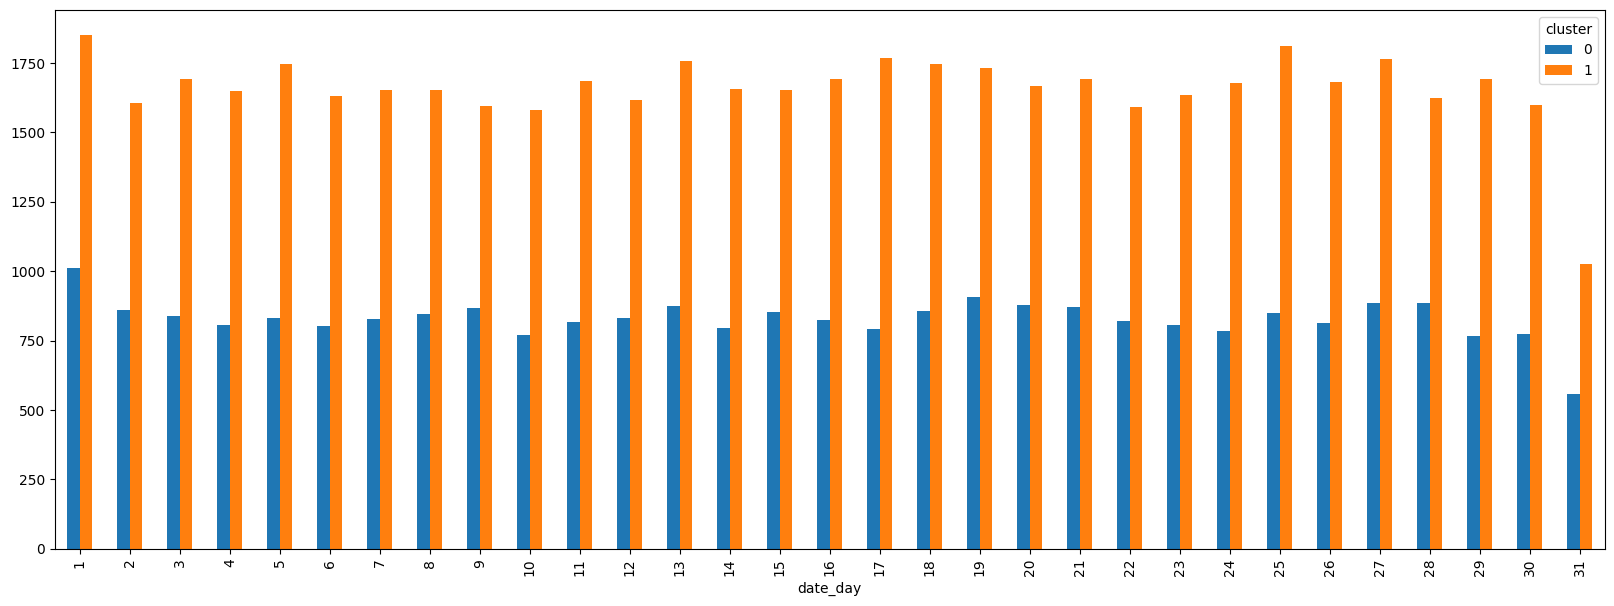

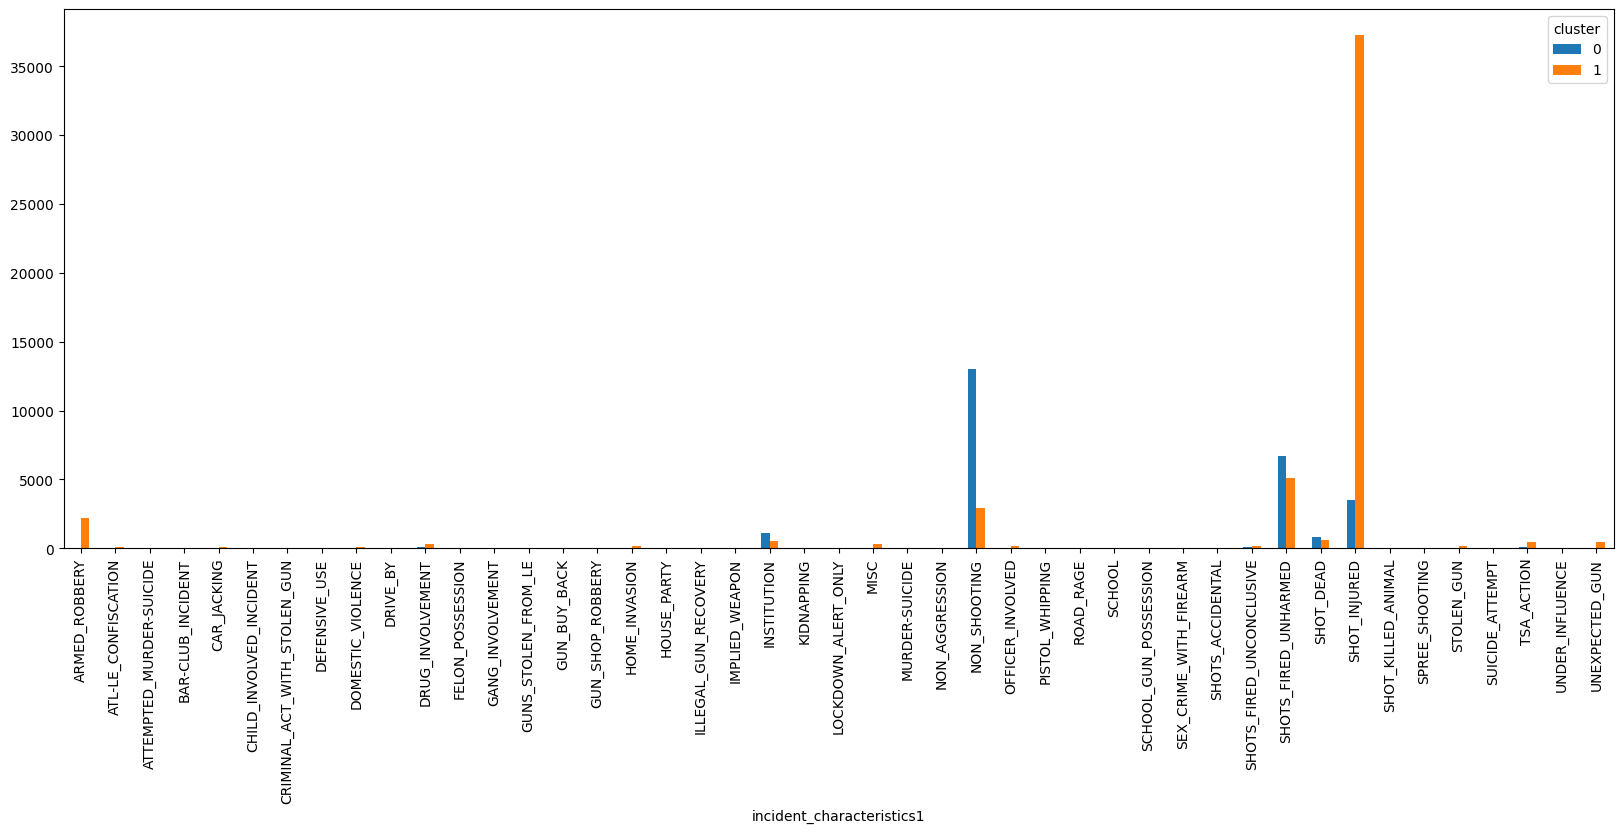

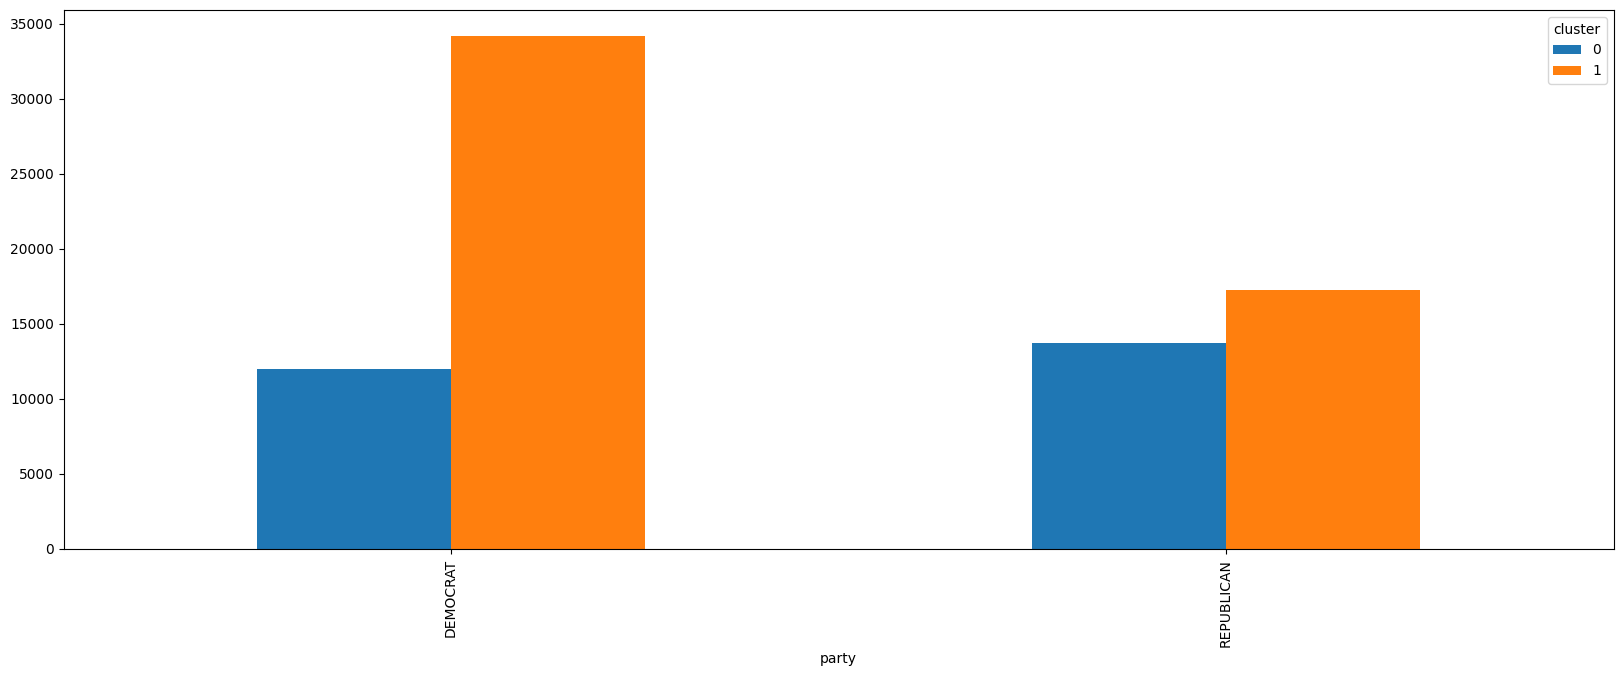

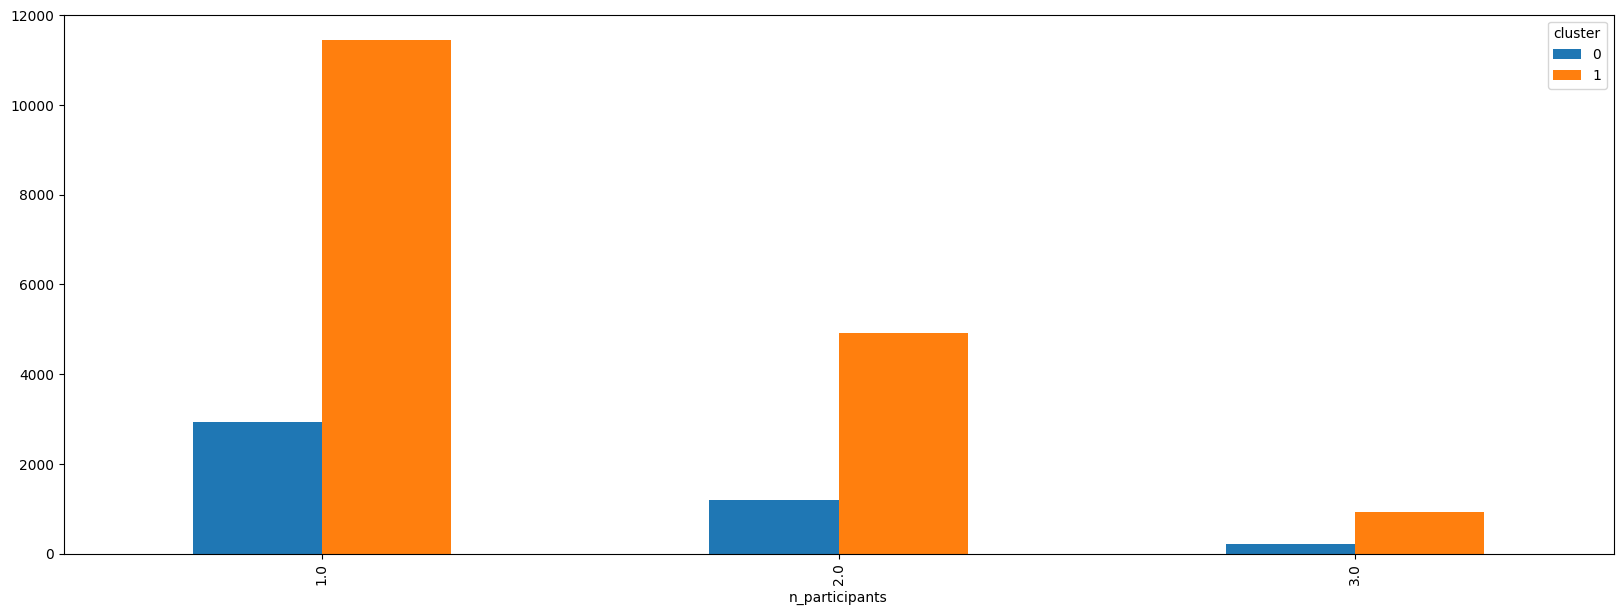

In [66]:


w_clusters = no_outliers.copy()
n_w_clusters = w_clusters.select_dtypes(include=['float64', 'int64'])
n_w_clusters_vals = scaler.inverse_transform(n_w_clusters)
n_w_clusters = pd.DataFrame(n_w_clusters_vals, columns=n_w_clusters.columns)
w_clusters[n_w_clusters.columns] = n_w_clusters
w_clusters['cluster'] = kmeans.labels_
w_clusters = w_clusters.sort_values(by=['cluster'])

o = w_clusters.select_dtypes(include=['float64', 'int64']).columns

cats = ['state', 'date_month', 'date_day', 'incident_characteristics1', 'party', 'n_participants']
for cat in cats:
    xt = pd.crosstab(w_clusters[cat], w_clusters['cluster'])
    xt['total'] = xt.sum(axis=1)
    del xt['total']
    xt = xt.sort_index()
    xt.plot.bar(stacked=False, figsize=(20, 7))
    plt.show();

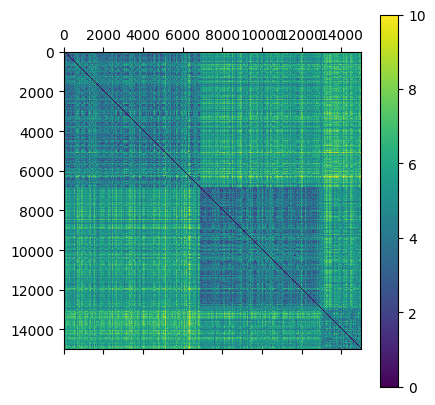

In [29]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

numeric_all = clean_no_outliers.select_dtypes(include=['float64', 'int64'])

numeric_all['cluster'] = kmeans.predict(numeric_all)

# numeric_scaled['cluster'] = kmeans.labels_

sample = numeric_all.sample(n=15000).copy()

sample = sample.sort_values(by=['cluster'])

# Calculate the Euclidean distance matrix
euclidean_distances = pdist(sample, metric='euclidean')

# reshape the distances into a square matrix
euclidean_distances = squareform(euclidean_distances)
euclidean_distances = euclidean_distances.clip(0,10)

plt.matshow(euclidean_distances)
plt.colorbar()
plt.show()

# -----------------------------------------------------------------------------------------------------------------------------

# D-BSCAN CLUSTERING

In [30]:
# Number of incidents per state (descending order)
print(final['state'].value_counts())

state
ILLINOIS          18488
CALIFORNIA        16289
FLORIDA           14331
TEXAS             13267
OHIO              10094
NEW YORK           9990
PENNSYLVANIA       8887
GEORGIA            8826
NORTH CAROLINA     8526
LOUISIANA          7917
TENNESSEE          7420
MISSOURI           6973
SOUTH CAROLINA     6886
MASSACHUSETTS      6124
MICHIGAN           6065
INDIANA            5709
VIRGINIA           5679
NEW JERSEY         5522
MARYLAND           5448
ALABAMA            5147
WISCONSIN          4839
KENTUCKY           4003
OKLAHOMA           3614
MISSISSIPPI        3460
WASHINGTON         3445
COLORADO           3354
CONNECTICUT        3127
ARKANSAS           2888
IOWA               2654
ARIZONA            2311
KANSAS             2278
OREGON             2278
MINNESOTA          1868
NEVADA             1865
NEBRASKA           1729
NEW MEXICO         1702
DELAWARE           1649
WEST VIRGINIA      1489
ALASKA             1371
UTAH               1077
NEW HAMPSHIRE       977
MAINE     

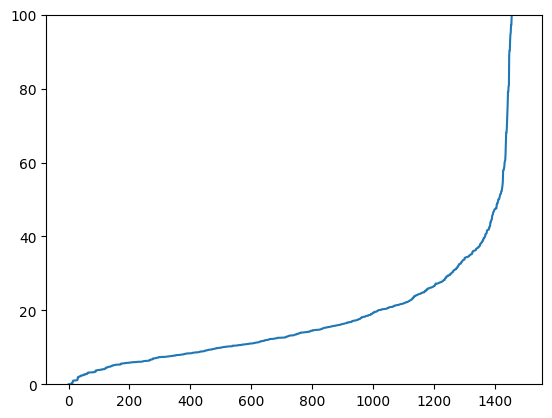

In [7]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

db_scaled = clean_no_outliers.copy()
per_state = db_scaled[db_scaled['state'] == 'FLORIDA']
numeric_cols = per_state.select_dtypes(include=['float64', 'int64']).columns

numeric_db = per_state[numeric_cols]

# NN
nn = NearestNeighbors(n_neighbors=2*numeric_db.shape[1])
nn.fit(numeric_db)
distances, indices = nn.kneighbors(numeric_db)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(0, 100)
plt.show()


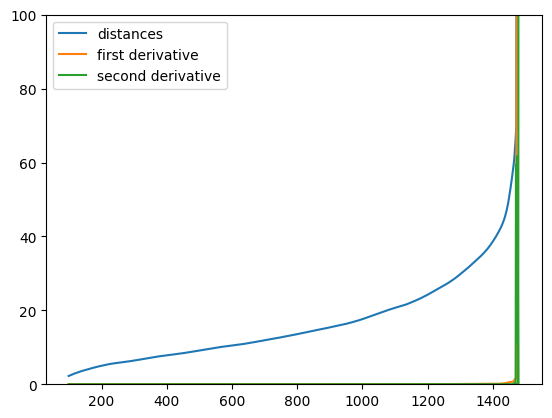

2

In [13]:
smooth_distance = pd.Series(distances).rolling(window=100).mean()
first_derivative = np.diff(smooth_distance)
second_derivative = np.diff(first_derivative)


plt.plot(smooth_distance, label='distances')
plt.plot(first_derivative, label='first derivative')
plt.plot(second_derivative, label='second derivative')
plt.legend()
plt.ylim(0, 100)
plt.show()

elbow = np.argmax(second_derivative) + 2
elbow

[-1  0  1  2]
(2098,)
(2098, 26)


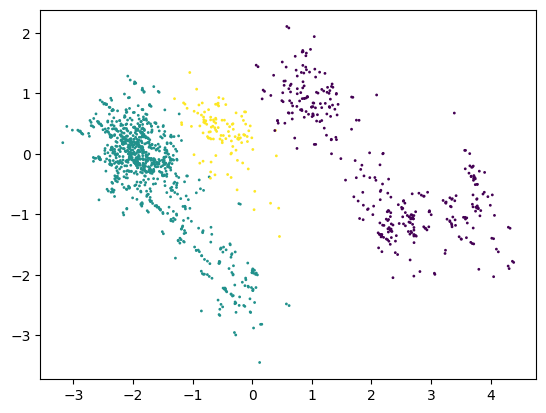

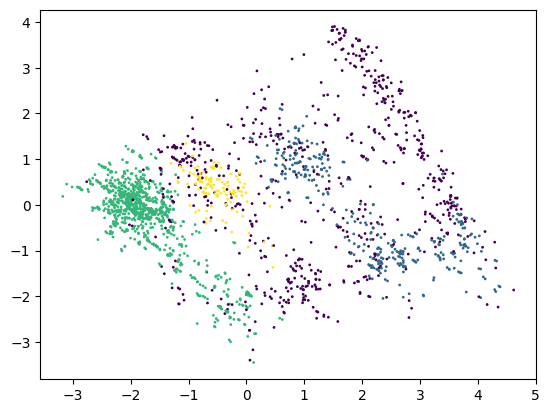

/tmp/ipykernel_6962/790922367.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_state.loc[per_state['state'] == 'FLORIDA', 'cluster'] = labels


In [43]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#we use the epsilon value of 1.8 and the minimum number of samples of 2 times the number of dimensions
dbs = DBSCAN(eps=1.9, min_samples=2*numeric_db.shape[1], n_jobs=6)
dbs.fit(numeric_db)
labels = dbs.labels_
print(np.unique(labels))
print(labels.shape)
print(numeric_db.shape)

# PCA
pca = PCA(n_components=2, random_state=42)
numeric_pca = pca.fit_transform(numeric_db)

filtered_data = numeric_pca[labels != -1]
filtered_labels = labels[labels != -1]

plt.scatter(filtered_data[:, 0], filtered_data[:, 1], s=1, c=filtered_labels)
plt.show()


plt.scatter(numeric_pca[:, 0], numeric_pca[:, 1], s=1, c=labels)
plt.show()

# Add cluster labels to w_clusters
per_state.loc[per_state['state'] == 'FLORIDA', 'cluster'] = labels

/tmp/ipykernel_6962/1670137055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_db['cluster'] = labels


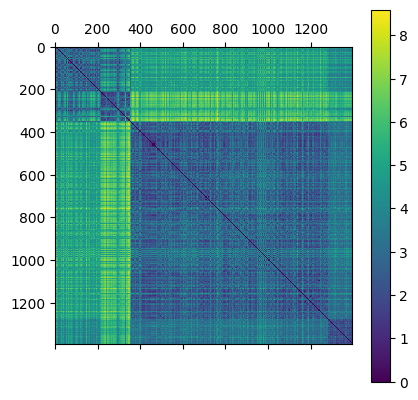

In [44]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

numeric_db['cluster'] = labels

sample = numeric_db.copy()
sample = sample[labels != -1]

sample = sample.sort_values(by=['cluster'])

# Calculate the Euclidean distance matrix
euclidean_distances = pdist(sample, metric='euclidean')

# reshape the distances into a square matrix
euclidean_distances = squareform(euclidean_distances)

plt.matshow(euclidean_distances)
plt.colorbar()
plt.show()

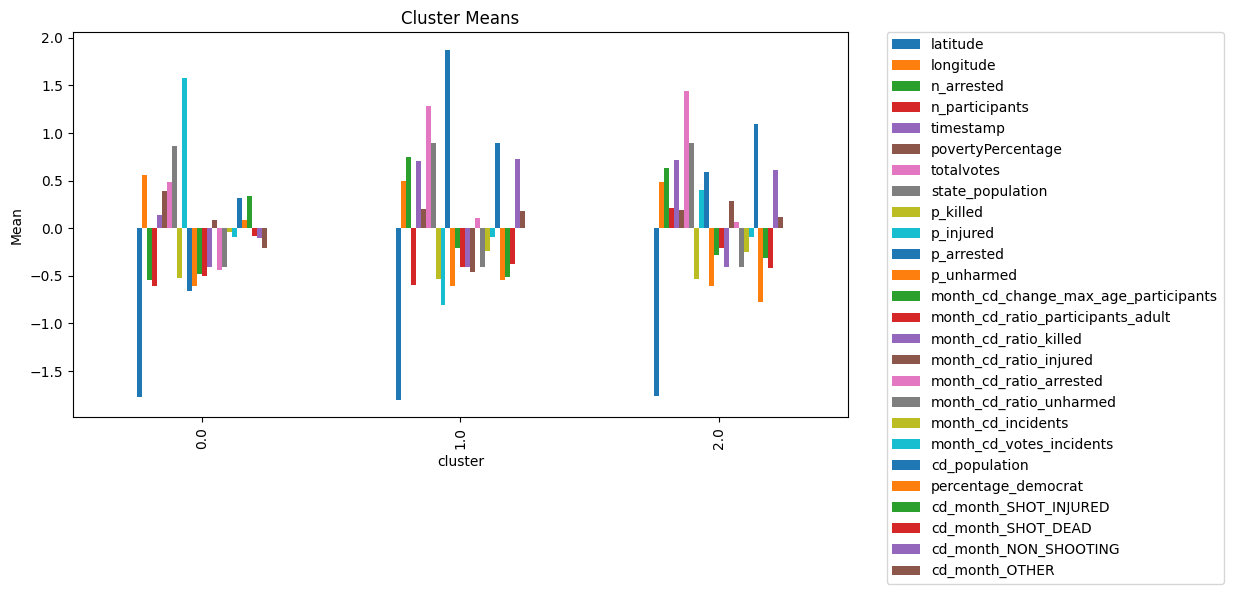

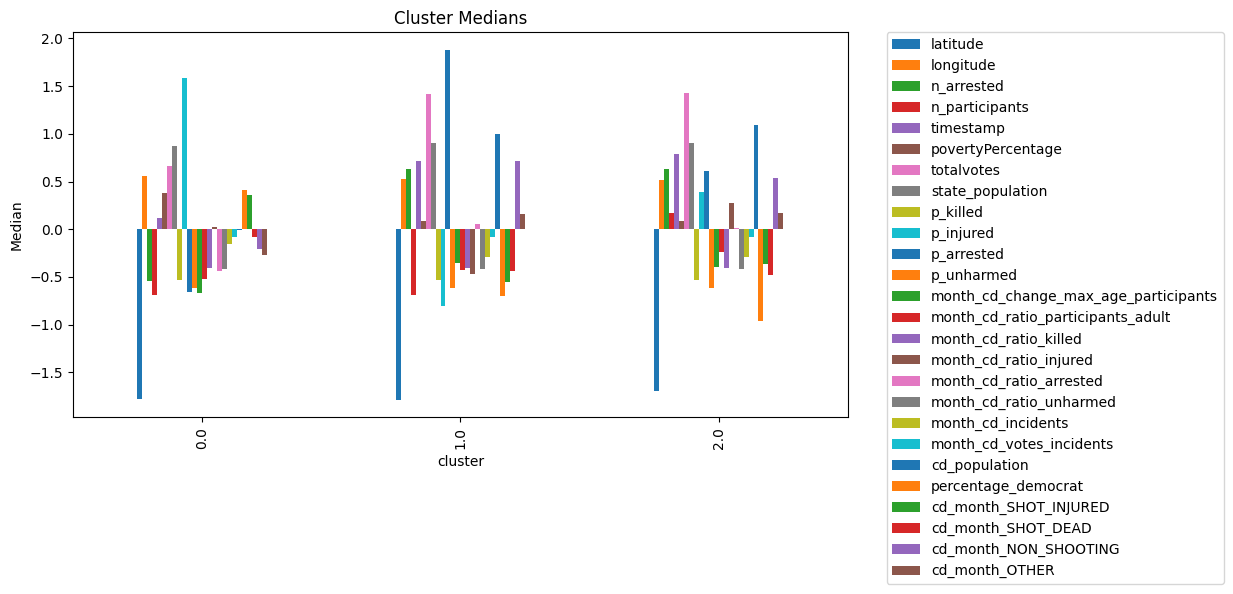

In [45]:
per_state_num = per_state.select_dtypes(include=['float64', 'int64'])
per_state_num = per_state_num[per_state_num['cluster'] != -1]
cluster_means = per_state_num.groupby('cluster').mean()
cluster_medians = per_state_num.groupby('cluster').median()
# 
# Calculate the difference between clusters
cluster_diff = cluster_means - cluster_medians
# 

import matplotlib.pyplot as plt

# Plotting the cluster means
plt.figure(figsize=(10, 5))
plt.title('Cluster Means')
plt.xlabel('Features')
plt.ylabel('Mean')
cluster_means.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Plotting the cluster medians
plt.figure(figsize=(10, 5))
plt.title('Cluster Medians')
plt.xlabel('Features')
plt.ylabel('Median')
cluster_medians.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



## Hierarchical clustering

(23340, 60)


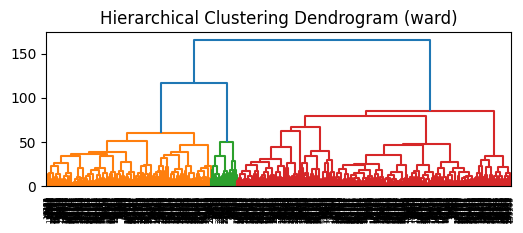

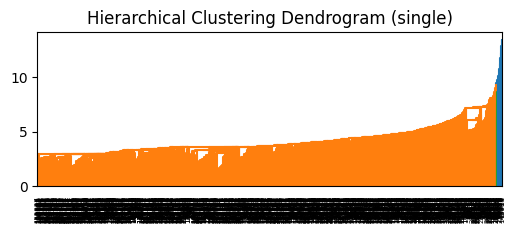

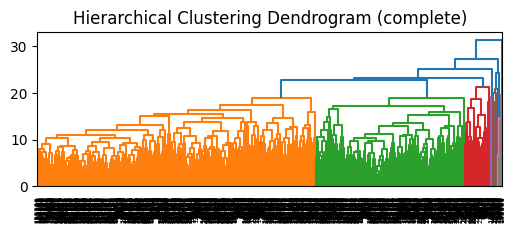

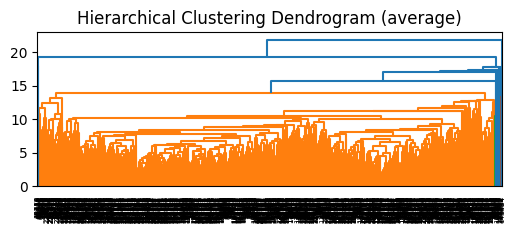

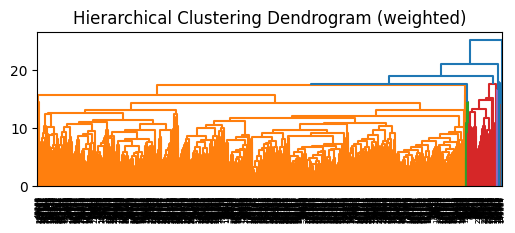

In [74]:
num_hierr = sample.copy()
num_hierr = num_hierr[num_hierr['state'] == 'FLORIDA']
num_hierr = num_hierr.select_dtypes(include=['float64', 'int64'])
print(num_hierr.shape)
# num_hierr = num_hierr.sample(n=1000)

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

linkeds = {}
for method in ['ward', 'single', 'complete', 'average', 'weighted']:
    linked = linkage(num_hierr, method=method)

    plt.figure(figsize=(6, 2))
    d = dendrogram(linked,
               orientation='top',
               labels=num_hierr.index,
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram ({})'.format(method))
    plt.show()
    linkeds[method] = linked





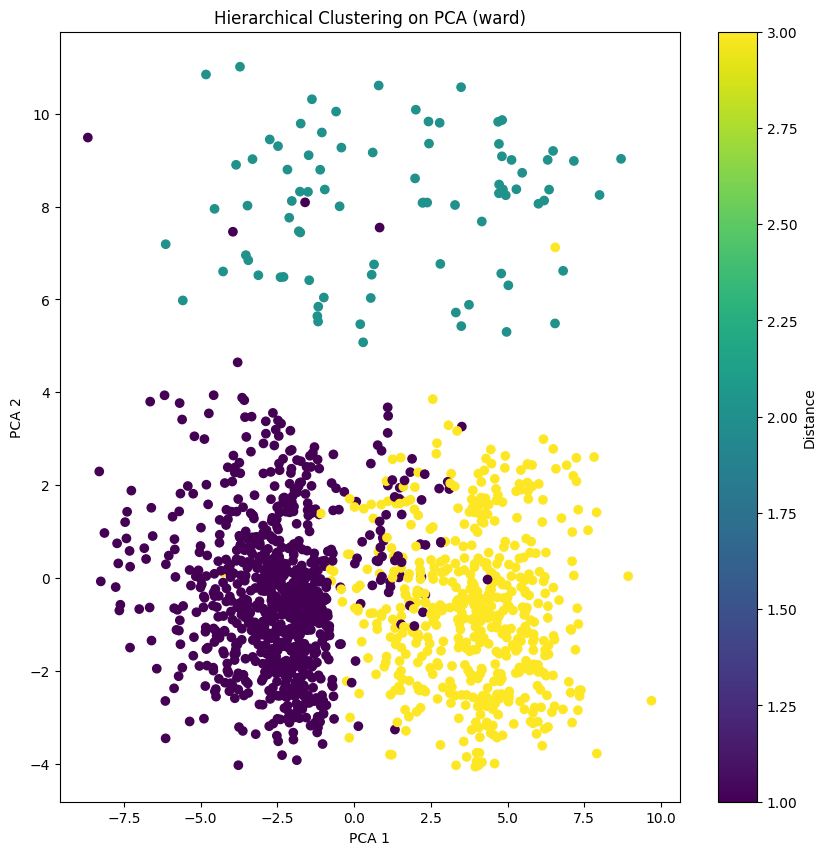

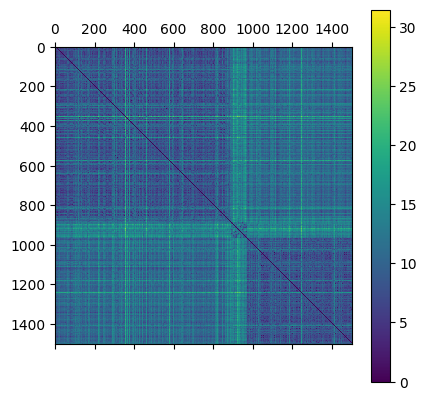

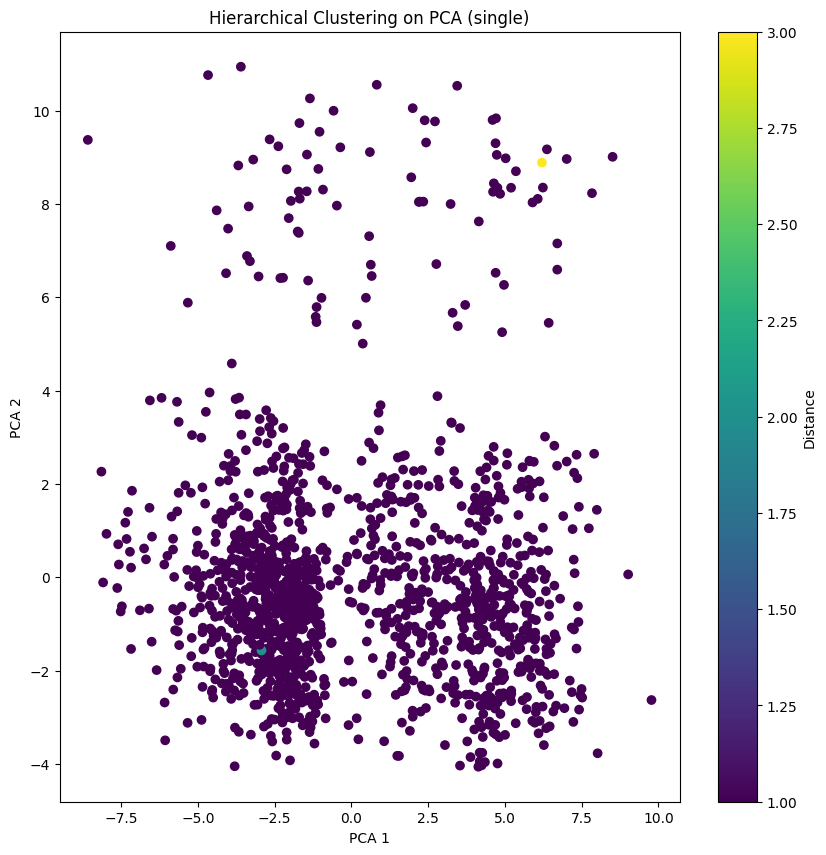

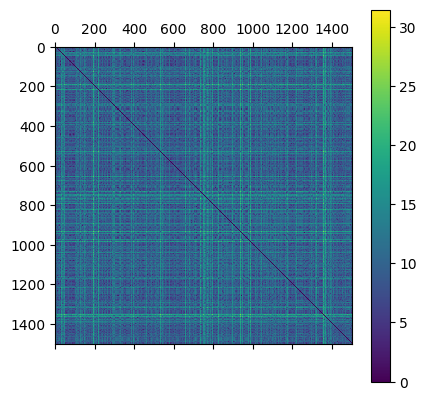

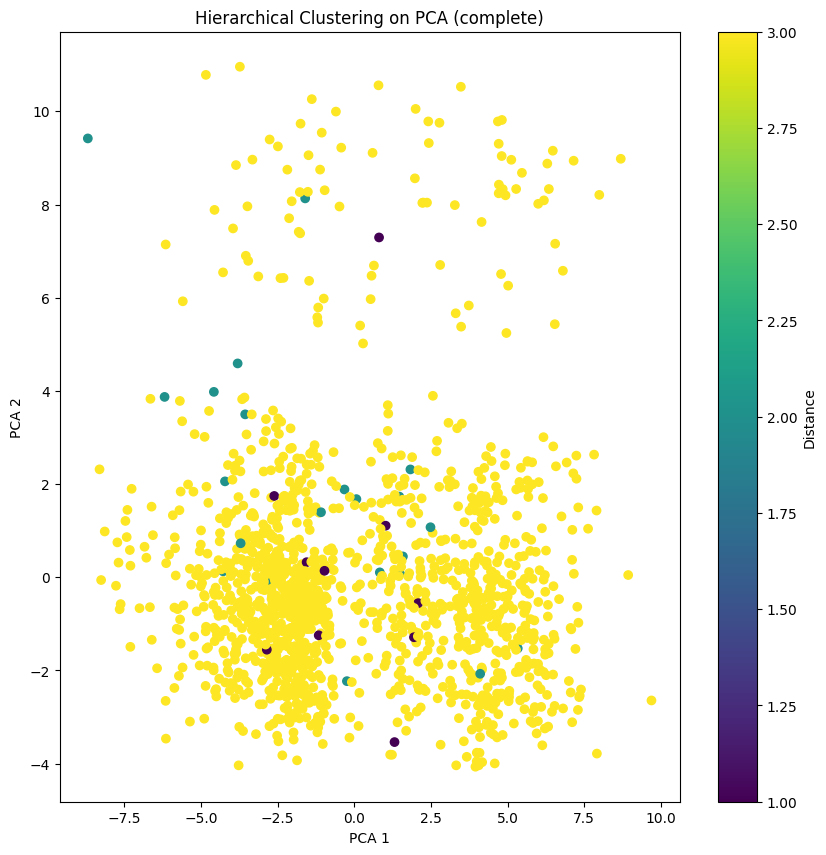

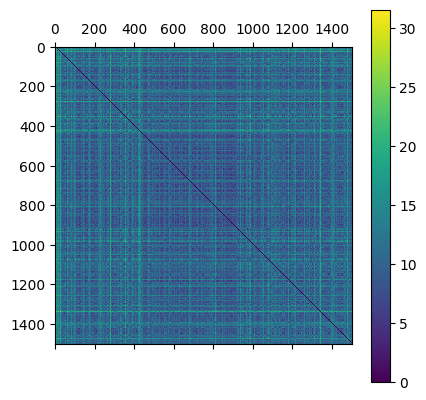

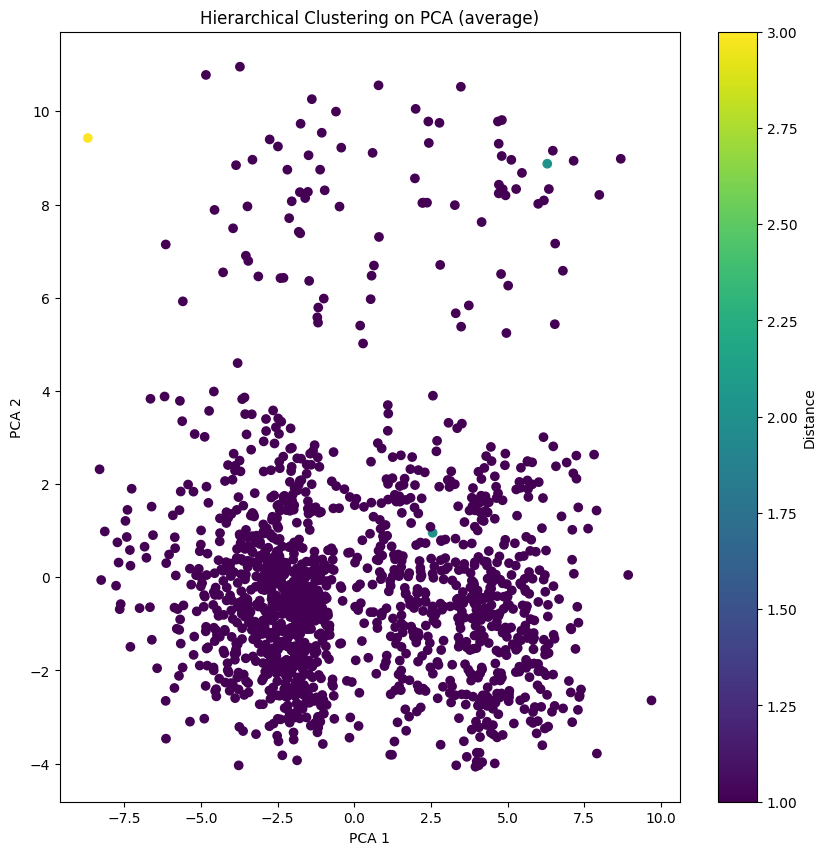

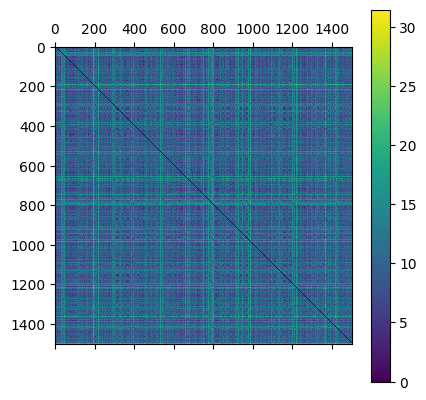

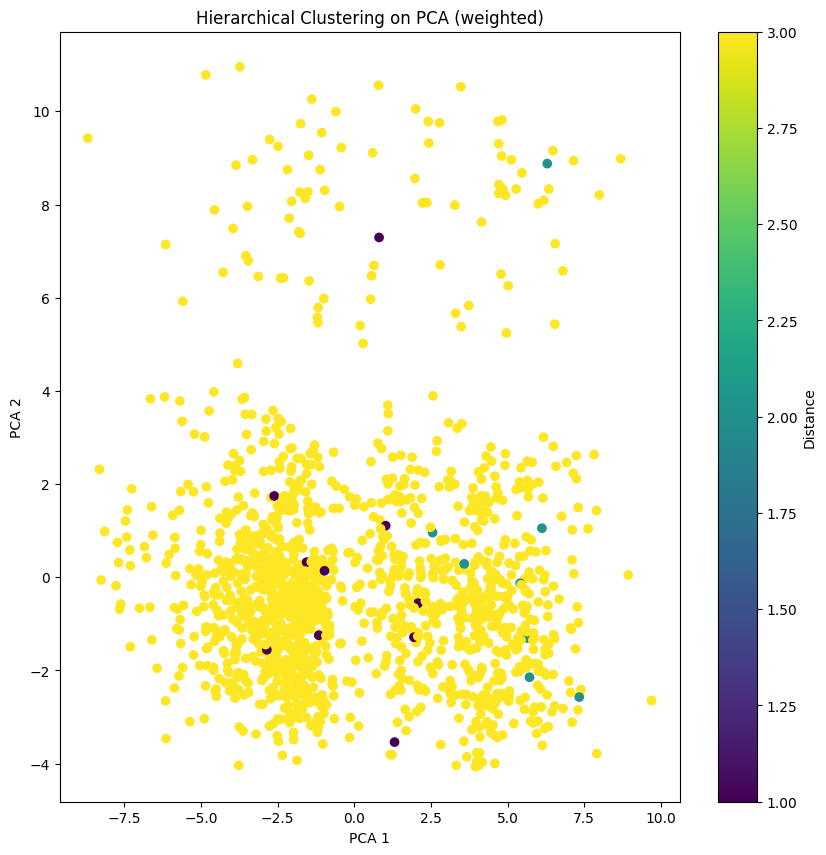

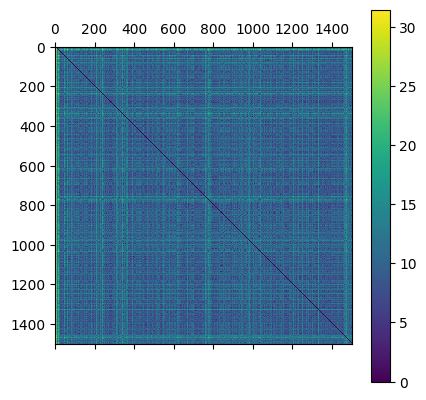

In [77]:

for method in linkeds:
    linked = linkeds[method]
    clusters = fcluster(linked, 3, criterion='maxclust')

    # Perform PCA
    pca = PCA(n_components=2)
    num_hierr_pca = pca.fit_transform(num_hierr)

    # Plot the result on PCA
    plt.figure(figsize=(10, 10))
    plt.scatter(num_hierr_pca[:, 0], num_hierr_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Hierarchical Clustering on PCA ({})'.format(method))
    plt.colorbar(label='Distance')
    plt.show()

    from scipy.spatial.distance import pdist, squareform
    import numpy as np

    num_hierr['cluster'] = clusters

    sample = num_hierr.copy()

    sample = sample.sort_values(by=['cluster'])

    # Calculate the Euclidean distance matrix
    euclidean_distances = pdist(sample, metric='euclidean')

    # reshape the distances into a square matrix
    euclidean_distances = squareform(euclidean_distances)

    plt.matshow(euclidean_distances)
    plt.colorbar()
    plt.show()

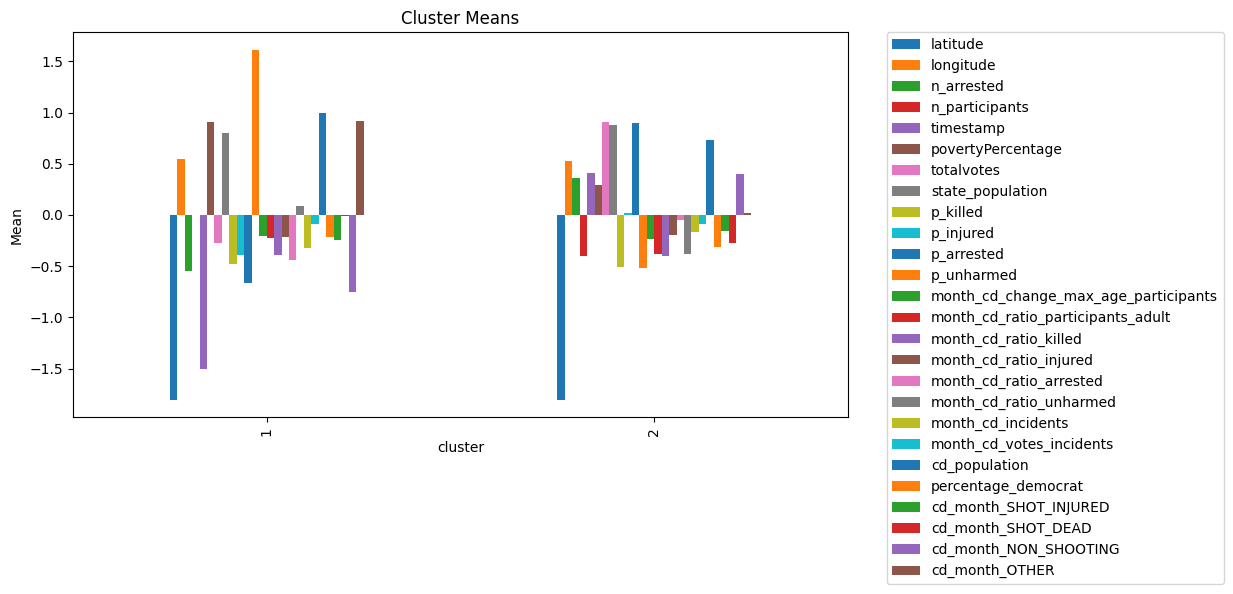

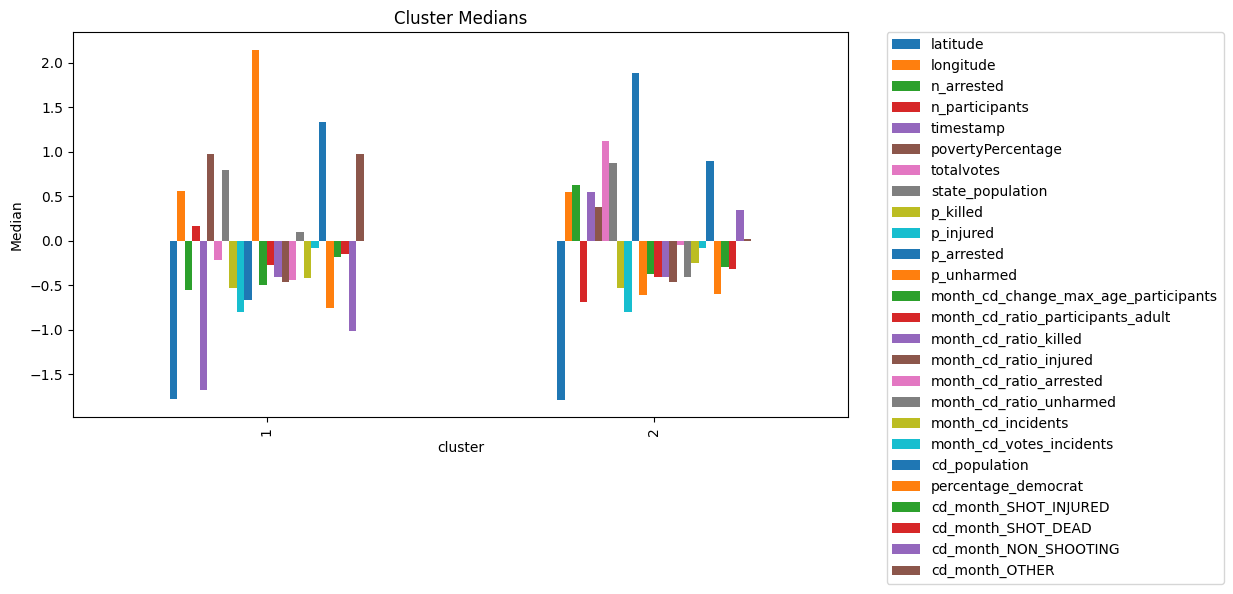

In [62]:
cluster_means = num_hierr.groupby('cluster').mean()
cluster_medians = num_hierr.groupby('cluster').median()
# 
# Calculate the difference between clusters
cluster_diff = cluster_means - cluster_medians
# 

import matplotlib.pyplot as plt

# Plotting the cluster means
plt.figure(figsize=(10, 5))
plt.title('Cluster Means')
plt.xlabel('Features')
plt.ylabel('Mean')
cluster_means.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# move legend outside of the plot


# Plotting the cluster medians
plt.figure(figsize=(10, 5))
plt.title('Cluster Medians')
plt.xlabel('Features')
plt.ylabel('Median')
cluster_medians.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



## k-SubMix

In [4]:
def cost(p1, p2, idx_num, idx_cat, gamma):
    # numerical cost
    cost_num = np.sum((p1[idx_num] - p2[idx_num])**2)
    # categorical cost
    cost_cat = np.sum(p1[idx_cat] != p2[idx_cat])
    return cost_num + gamma * cost_cat

In [27]:
numerical_filtered = numerical_scaled.copy()

keywords = [
    'cd_'
]

for keyword in keywords:
    numerical_filtered = numerical_filtered[numerical_filtered.columns.drop(list(numerical_filtered.filter(regex=keyword)))]

numerical_filtered.columns

Index(['latitude', 'longitude', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'timestamp',
       'povertyPercentage', 'candidatevotes', 'totalvotes', 'state_population',
       'p_males', 'p_females', 'p_participants_child', 'p_participants_teen',
       'p_participants_adult', 'p_killed', 'p_injured', 'p_arrested',
       'p_unharmed', 'percentage_republican', 'percentage_democrat'],
      dtype='object')

In [28]:
from k_SubMix import kSubMix
from sklearn.metrics import silhouette_score

ds = numerical_filtered.copy()
ds['DUCK_I_NEED_A_DUMMY_VALUE'] = "0"
ds['DUCK_I_NEED_A_DUMMY_VALUE2'] = "0"


# ds.drop(columns=['CLEAN', 'OUTLIER'], inplace=True)

cat_cols = ['date_month', 'date_day', 'congressional_district', 'state', 'incident_characteristics1', 'city_or_county', 'party']
cat_cols = ds.select_dtypes(include=['object']).columns
# index of numerical columns
index_num_list = [ds.columns.get_loc(col) for col in ds.columns if col not in cat_cols]
# index of categorical columns
index_cat_list = [ds.columns.get_loc(col) for col in cat_cols]

index_num_list.sort()
index_cat_list.sort()

print(index_cat_list)
print(index_num_list)

# map objects to integers
for col in cat_cols:
    ds[col] = ds[col].astype('category').cat.codes

dataset = ds.values
numeric = dataset[:, index_num_list]
categorical = dataset[:, index_cat_list]

ksms = {}

def run_ksm(k, gamma):
        print('Running k = {} and gamma = {}'.format(k, gamma))
        ksm = kSubMix([k, 1], max_iter=100, gamma = gamma, earlyStoppingNMI=1)
        ksm.fit(dataset, numeric, categorical, None)
        ss = silhouette_score(numeric, ksm.labels[0])
        print('Done    k = {} and gamma = {}'.format(k, gamma))
        return (ksm, ss)

KS = [i for i in range(2, 9)]
GS = [0]

import concurrent.futures

results = {}

def run_ksm_thread(k, gamma):
    result = run_ksm(k, gamma)
    return (k, gamma, result)

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for k in KS:
        for gamma in GS:
            futures.append(executor.submit(run_ksm_thread, k, gamma))
    
    for future in concurrent.futures.as_completed(futures):
        k, gamma, result = future.result()
        results[(k, gamma)] = result

# Access the results
for k, gamma in results:
    ksm, ss = results[(k, gamma)]
    print(f'k = {k}, gamma = {gamma}: silhouette score = {ss}')


[31, 32]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Running k = 2 and gamma = 0
Running k = 3 and gamma = 0
Running k = 4 and gamma = 0
Running k = 5 and gamma = 0
Running k = 6 and gamma = 0
Running k = 7 and gamma = 0
Running k = 8 and gamma = 0
Iterations at exit: 4
Done    k = 2 and gamma = 0
Iterations at exit: 11
Done    k = 7 and gamma = 0
Iterations at exit: 13
Done    k = 6 and gamma = 0
Iterations at exit: 16
Done    k = 4 and gamma = 0
Iterations at exit: 15
Done    k = 8 and gamma = 0
Iterations at exit: 21
Done    k = 5 and gamma = 0
Iterations at exit: 44
Done    k = 3 and gamma = 0
k = 2, gamma = 0: silhouette score = 0.18379413165523173
k = 7, gamma = 0: silhouette score = 0.14657190016377547
k = 6, gamma = 0: silhouette score = 0.12130118844039887
k = 4, gamma = 0: silhouette score = 0.08525138102373651
k = 8, gamma = 0: silhouette score = 0.14392695427748345
k = 5, gamma = 0: silhouette score = 0.

In [23]:
ksm: kSubMix = results[(8,0)][0]
ksm.transform_clustered_space(numeric, 0)

AttributeError: 'kSubMix' object has no attribute 'P'

In [29]:
silhs = {}
for k, gamma in results:
    ksm = results[(k, gamma)][0]
    Pnc = ksm.Pn[0]
    Pnn = ksm.Pn[1]

    silhs[k] = (
        silhouette_score(numeric[:, Pnc], ksm.labels[0]),
        silhouette_score(numeric[:, Pnn], ksm.labels[0])
    )

In [31]:
cols = results[(2, 0)][0].Pn[0]
col_names = ds.columns[cols]
print(col_names)

Index(['state_population', 'p_participants_adult', 'totalvotes',
       'n_participants', 'longitude', 'timestamp', 'n_killed', 'n_injured',
       'n_participants_child', 'avg_age_participants', 'p_males', 'p_killed',
       'p_females', 'candidatevotes', 'latitude'],
      dtype='object')


In [30]:
silhs

{2: (0.22981625849151288, 0.14121505810436338),
 7: (0.10570083411583692, 0.11549738386324102),
 6: (0.0633647484517546, 0.10867369398777194),
 4: (0.07431436471501496, 0.05870217707353096),
 8: (0.09975647678387844, 0.1532018689431959),
 5: (0.10696002071792172, 0.11455398818546789),
 3: (0.09421511845104864, 0.11281174674995055)}

In [64]:
silhs = []
for k in ksms:
    for gamma in ksms[k]:
        silhs.append((k, gamma, ksms[k][gamma][1]))

silhs = pd.DataFrame(silhs, columns=['k', 'gamma', 'silhouette'])
silhs = silhs.sort_values(by=['silhouette'], ascending=False)
silhs

k  gamma  silhouette
0  2      0    0.351977
1  2      1    0.301929
4  4      0    0.214923
3  3      1    0.212052
2  3      0    0.186288
5  4      1    0.148455

cluster
0    8087
1    1913
Name: count, dtype: int64
[array([19, 24, 18, 14,  1, 15, 10, 11,  5,  3, 20, 25, 21, 17,  0]), array([27, 26, 29, 12,  8, 23, 28,  4,  2,  9, 22,  6, 16, 13, 30,  7])]


<Figure size 1000x1000 with 0 Axes>

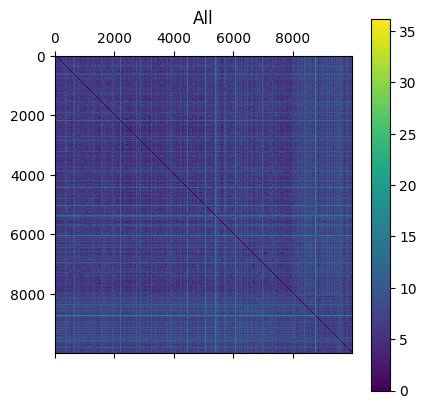

<Figure size 1000x1000 with 0 Axes>

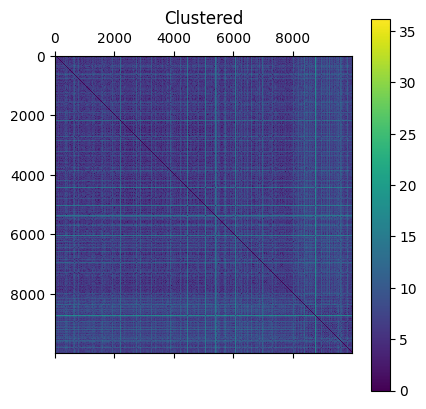

<Figure size 1000x1000 with 0 Axes>

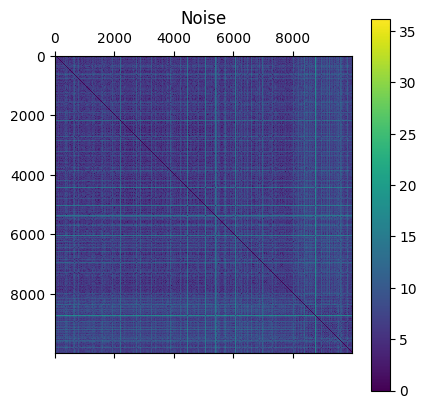

In [32]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

K = 2
GAMMA = 0
ksm = results[(K, GAMMA)][0]

dsn = ds.copy()
# dsn = dsn.select_dtypes(include=['float64', 'int64'])

dsn['cluster'] = ksm.labels[0]

print(dsn['cluster'].value_counts())

sample = dsn.copy()
# sample = sample.sample(n=1000, random_state=0)

sample = sample.sort_values(by=['cluster']).copy()

del sample['cluster']

print(ksm.Pn)

# Calculate the Euclidean distance matrix
num_clustered = np.array(index_num_list)[ksm.Pn[0]]
cat_clustered = np.array(index_cat_list)[ksm.Pc[0]]
num_noise = np.array(index_num_list)[ksm.Pn[1]]
cat_noise = np.array(index_cat_list)[ksm.Pc[1]]
# distances = pdist(sample, metric=lambda u, v: cost(u, v, index_num_list, index_cat_list, GAMMA))
# distances_clustered = pdist(sample, metric=lambda u, v: cost(u, v, num_clustered, cat_clustered, GAMMA))
# distances_noise = pdist(sample, metric=lambda u, v: cost(u, v, num_noise, cat_noise, GAMMA))

distances = pdist(sample)
distances_clustered = pdist(sample)
distances_noise = pdist(sample)

# reshape the distances into a square matrix
distances = squareform(distances)
distances_clustered = squareform(distances_clustered)
distances_noise = squareform(distances_noise)

plt.figure(figsize=(10, 10))
plt.matshow(distances)
plt.title('All')
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 10))
plt.matshow(distances_clustered)
plt.title('Clustered')
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 10))
plt.matshow(distances_noise)
plt.title('Noise')
plt.colorbar()
plt.show()

In [34]:
num_clustered
ksm.Pn[0]

array([19, 24, 18, 14,  1, 15, 10, 11,  5,  3, 20, 25, 21, 17,  0])

In [12]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

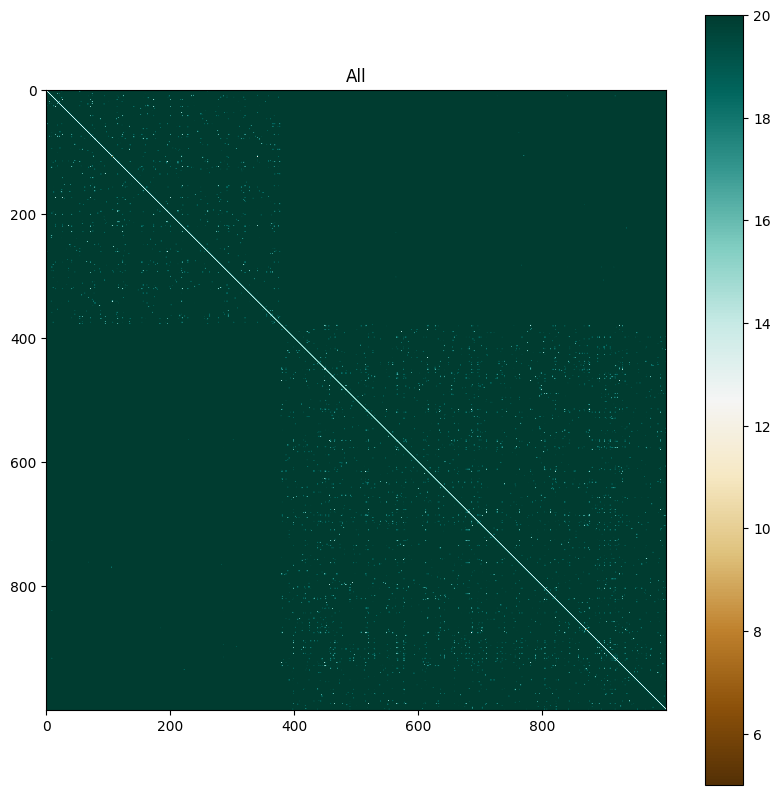

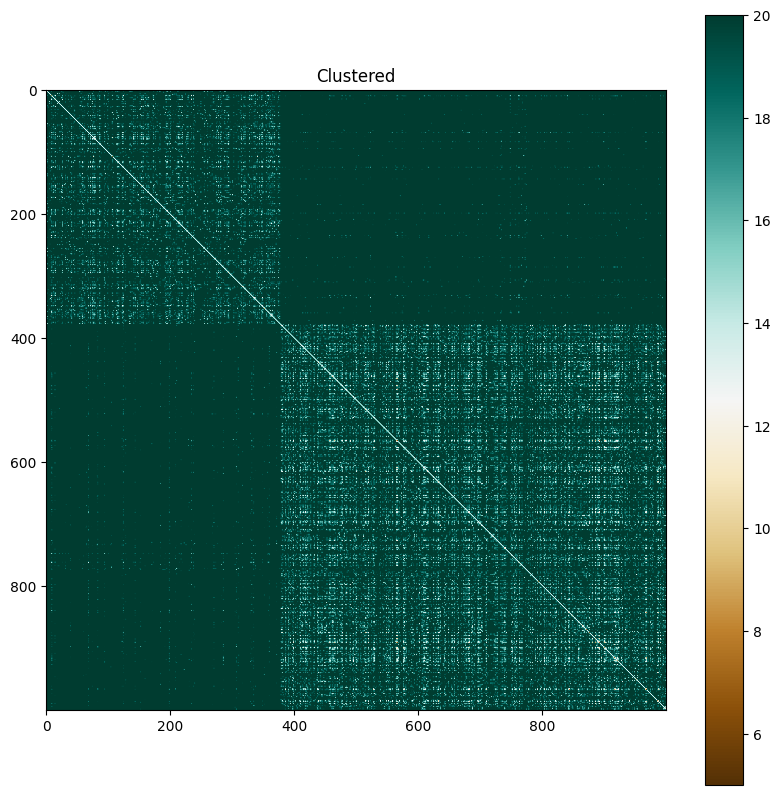

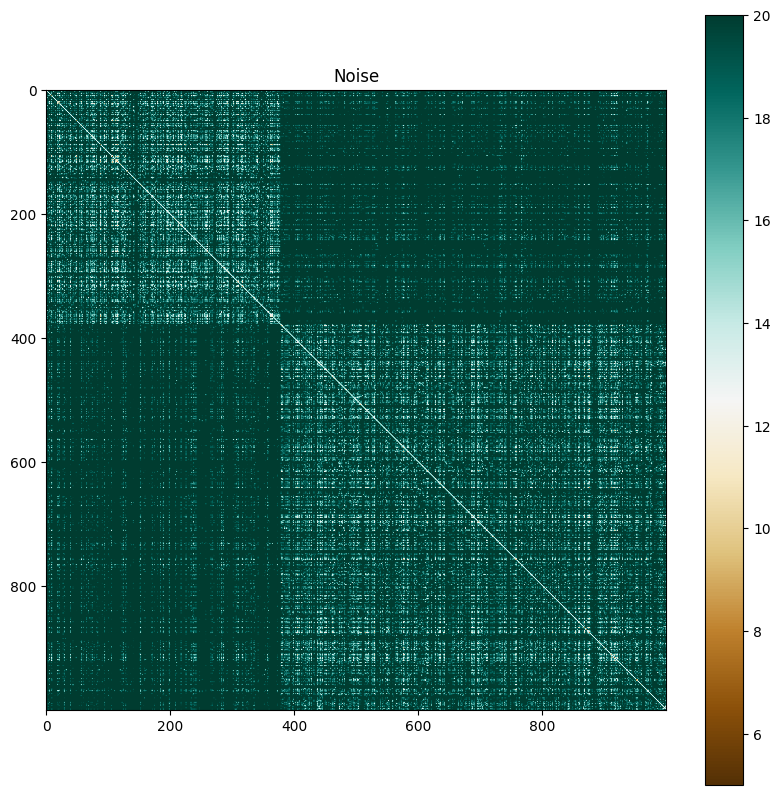

In [68]:
da = distances.copy()
dc = distances_clustered.copy()
dn = distances_noise.copy()
da = da.clip(5, 20)
dc = dc.clip(5, 20)
dn = dn.clip(5, 20)

plt.figure(figsize=(10, 10))
plt.imshow(da, cmap='BrBG')
plt.title('All')
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(dc, cmap='BrBG')
plt.title('Clustered')
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(dn, cmap='BrBG')
plt.title('Noise')
plt.colorbar()
plt.show()

In [66]:
print(ksm.Pn)
print(ksm.Pc)

[array([17, 20,  5, 28, 47,  9, 49,  6, 27, 34, 42, 36, 21, 44, 10,  8, 24,
        7, 16, 35, 12, 31, 15, 13, 32,  0]), array([11, 25, 45,  2, 38, 37, 29,  4, 40, 43, 30, 39, 48, 22, 19, 18, 23,
       33, 26,  3, 14, 41,  1, 46])]
[array([3]), array([4, 5, 0, 1, 6, 2, 7])]


In [67]:
Pc = np.concatenate((num_clustered, cat_clustered))

print(ds.columns[Pc])

Pn = np.concatenate((num_noise, cat_noise))

print(ds.columns[Pn])

Index(['candidatevotes', 'p_males', 'n_participants_child', 'p_unharmed',
       'cd_month_SHOT_DEAD', 'n_females', 'cd_month_OTHER',
       'n_participants_teen', 'p_arrested',
       'month_cd_ratio_participants_child', 'month_cd_votes_incidents',
       'month_cd_ratio_participants_adult', 'p_females',
       'percentage_republican', 'n_killed', 'n_males', 'p_participants_adult',
       'n_participants_adult', 'povertyPercentage',
       'month_cd_ratio_participants_teen', 'n_arrested',
       'month_cd_change_max_age_participants', 'timestamp', 'n_unharmed',
       'month_cd_ratio_males', 'latitude', 'congressional_district'],
      dtype='object')
Index(['n_injured', 'p_killed', 'percentage_democrat', 'min_age_participants',
       'month_cd_ratio_injured', 'month_cd_ratio_killed',
       'month_cd_change_min_age_participants', 'max_age_participants',
       'month_cd_ratio_unharmed', 'cd_population',
       'month_cd_change_avg_age_participants', 'month_cd_ratio_arrested',
      